## Библиотеки

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from random import randint
import math
import statistics
import statsmodels.api as sm

# №1
**Загрузить данные из файла “insurance.csv”.**

In [2]:
df1 = pd.read_csv('/Users/katy/Documents/Mirea/7 сем/Бигдата/ПР3/insurance.csv')

# №2
**С помощью метода describe() посмотреть статистику по данным. Сделать выводы.**

In [3]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Получили описательную статистику для всех столбцов датасета.
Минимальный возраст в датасете - 19 лет, максимальный - 64 года, средний - 39 лет. Стандартное отклонение - 14.05. 
Также можно увидеть разделение данных по квантилям: 25% данных не превышают значения 27, 50% данных - 39, 75% данных - 51.

*С остальными столбцами аналогично.
Еще можно выросы посмотреть, но там дальше задание будет на это.*

# №3
**Построить гистограммы для числовых показателей. Сделать выводы.**

##### Гистограммы частот

Text(0.5, 1.0, 'Гистограмма частот для возраста')

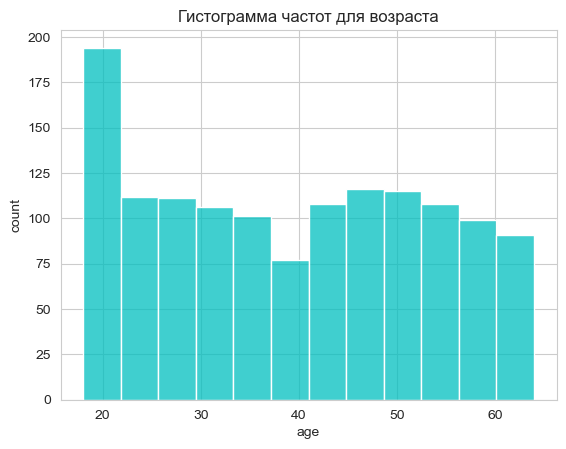

In [4]:
sns.histplot(df1['age'], kde= False, color='c')
plt.ylabel('count')
plt.title('Гистограмма частот для возраста')

Данные распределены по равномерному распределению.

Text(0.5, 1.0, 'Гистограмма частот для индекса массы тела')

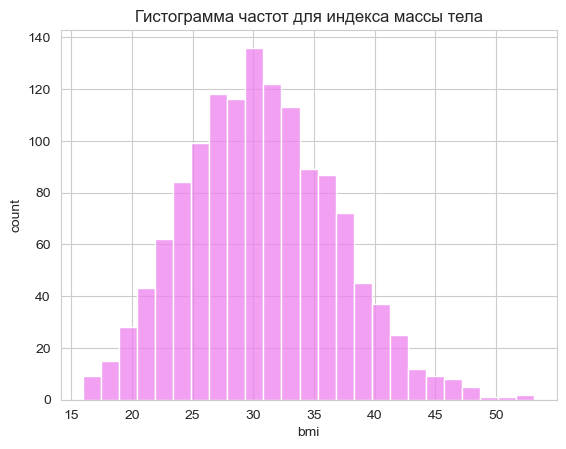

In [5]:
sns.histplot(df1['bmi'], kde= False, color='violet')
plt.ylabel('count')
plt.title('Гистограмма частот для индекса массы тела')

Данные распределены по нормальному распределению.

Text(0.5, 1.0, 'Гистограмма частот количества детей')

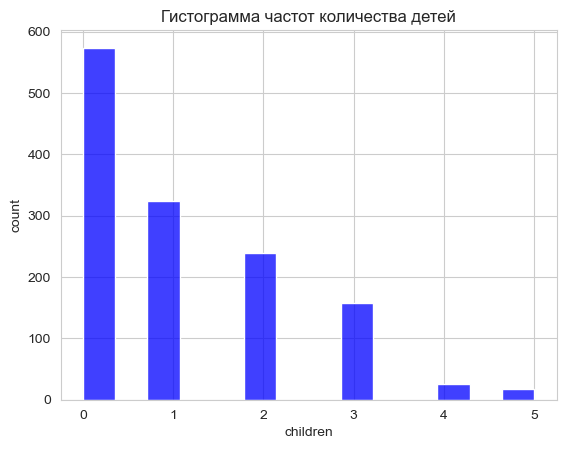

In [6]:
sns.histplot(df1['children'], kde= False, color='b')
plt.ylabel('count')
plt.title('Гистограмма частот количества детей')

Данные распределены по экспоненциальному распределению.

# №4
**Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.**

##### Меры центральной тенденции для индекса массы тела

In [7]:
bmi_mode = sts.mode(df1['bmi'], axis= None, keepdims= False)
bmi_mean = df1['bmi'].mean()
bmi_med = df1['bmi'].median()
bmi_mst = pd.DataFrame([bmi_med, bmi_mode[0], bmi_mean], index=['Медиана', 'Мода', 'Среднее'], columns=["Value"])
bmi_mst

,Value
Медиана,30.400000
Мода,32.300000
Среднее,30.663397


##### График мер центральной тенденции для индекса массы тела

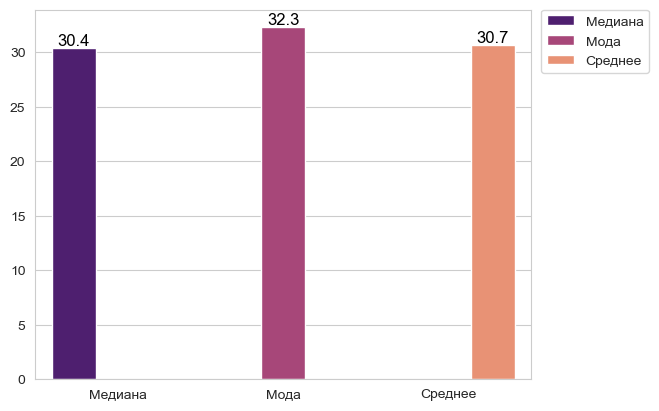

In [8]:
bmi_data = {'Measure': ['Медиана', 'Мода', 'Среднее'],
            'Value': [bmi_med, bmi_mode[0], bmi_mean]}
ax = sns.barplot(x= 'Measure', y= 'Value', data= bmi_data, palette = 'magma', hue = 'Measure')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)

for p in ax.patches:
    ax.annotate(round(p.get_height(), 1), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

##### Меры центральной тенденции для расходов

In [9]:
charges_mode = sts.mode(df1['charges'], axis= None, keepdims= False)
charges_mean = round(df1['charges'].mean(), 3)
charges_med = round(df1['charges'].median(), 3)
charges_mst = pd.DataFrame([charges_med, charges_mode[0], charges_mean], index=['Медиана', 'Мода', 'Среднее'], columns=["x"])
charges_mst

,x
Медиана,9382.0330
Мода,1639.5631
Среднее,13270.4220


##### График  мер центральной тенденции для расходов

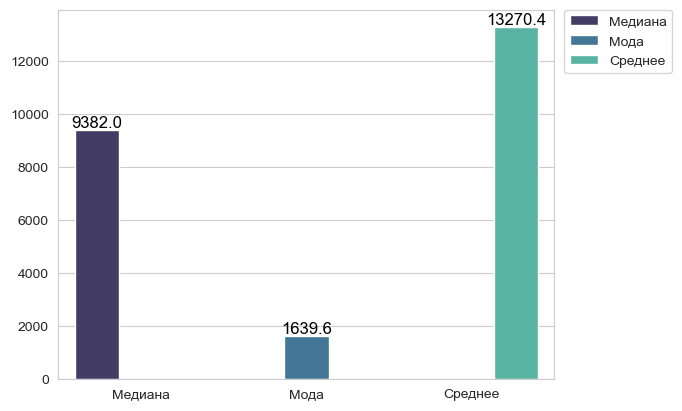

In [10]:
charges_data = {'Measure': ['Медиана', 'Мода', 'Среднее'],
            'Value': [charges_med, charges_mode[0], charges_mean]}
ax = sns.barplot(x= 'Measure', y= 'Value', data= charges_data, palette = 'mako', hue = 'Measure')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)

for p in ax.patches:
    ax.annotate(round(p.get_height(), 1), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# №5
**Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.**

##### Box-plot для индекса массы тела и возраста

Text(0.5, 1.0, 'Box-plot для индекса массы тела и возраста')

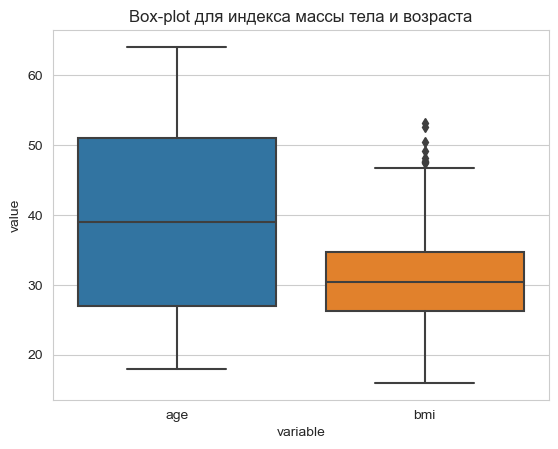

In [11]:
df_bp = pd.melt(df1)
df_bp = df_bp[(df_bp['variable'] == 'age') | (df_bp['variable'] == 'bmi')]
sns.boxplot(x= 'variable', y= 'value', data= df_bp)
plt.title("Box-plot для индекса массы тела и возраста")

##### Box-plot для дохода

Text(0.5, 1.0, 'Box-plot для дохода')

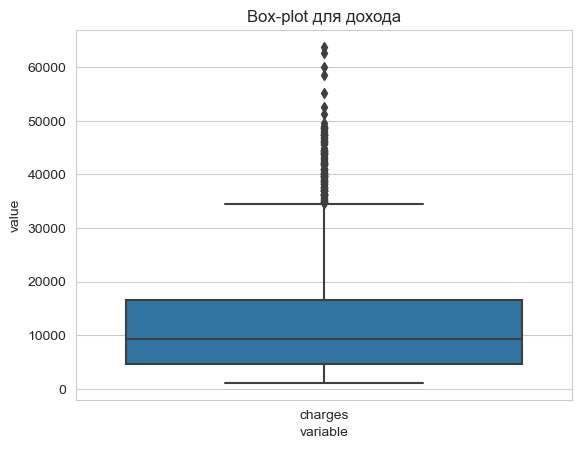

In [12]:
df_bp1 = pd.melt(df1)
df_bp1 = df_bp1[(df_bp1['variable'] == 'charges')]
sns.boxplot(x= 'variable', y= 'value', data= df_bp1)
plt.title("Box-plot для дохода")

# №6
**Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений.
Сделать выводы.**

##### Проверим выполняется ли ЦПТ на признаке charges.

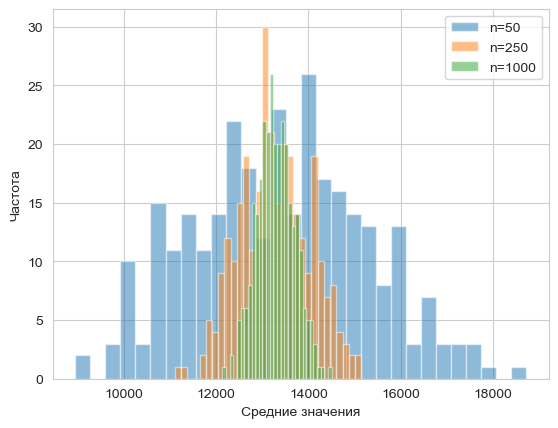

Стандартное отклонение для n=50: 1880.2603042088078
Среднее значение для n=50: 13379.579585314134
Стандартное отклонение для n=250: 756.4758674786666
Среднее значение для n=250: 13267.1534650924
Стандартное отклонение для n=1000: 402.06945470776213
Среднее значение для n=1000: 13283.030774798786


In [13]:
df_cpt2 = df1['charges']

N_samples = 300
sample_sizes = [50, 250, 1000]

sample_means = []
std_values = []
graph_means = []

for n in sample_sizes:
    means = []
    for j in range(N_samples):
        sample = np.random.choice(df_cpt2, size=n, replace=True)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    sample_means.append(means)
    std_value = np.std(means)
    std_values.append(std_value)

for i, n in enumerate(sample_sizes):
    plt.hist(sample_means[i], bins=30, alpha=0.5, label=f'n={n}')

plt.legend(loc='upper right')
plt.xlabel('Средние значения')
plt.ylabel('Частота')
plt.show()

for q in range(len(sample_means)):
    m = statistics.mean(sample_means[q])
    graph_means.append((m))

for i, n in enumerate(sample_sizes):
    print(f'Стандартное отклонение для n={n}: {std_values[i]}')
    print(f'Среднее значение для n={n}: {graph_means[i]}')


Можем сделать вывод, что ЦПТ выполняется.

# №7
**Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.**

##### Доверительные интервалы для среднего значения расходов, 95% и 99% соответственно.

In [14]:
sts.norm.interval(confidence= 0.95, loc=np.mean(df1['charges']), scale=sts.sem(df1['charges']))

(12621.54197822916, 13919.302552053354)

In [15]:
sts.norm.interval(confidence= 0.99, loc=np.mean(df1['charges']), scale=sts.sem(df1['charges']))

(12417.649014863586, 14123.195515418927)

##### Доверительные интервалы для среднего значения индекса массы тела.

In [16]:
sts.norm.interval(confidence= 0.95, loc=np.mean(df1['bmi']), scale=sts.sem(df1['bmi']))

(30.33664297153481, 30.990150750438264)

In [17]:
sts.norm.interval(confidence= 0.99, loc=np.mean(df1['bmi']), scale=sts.sem(df1['bmi']))

(30.233969458168293, 31.092824263804783)

# №8
**Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.**

H0 - Принадлежит нормальному распределению.
H1 - Не принадлежит.

##### Проверка на нормальность для bmi.

In [18]:
df_kst_bmi = df1['bmi'].tolist()
df_kst_fit_bmi = np.hstack([np.repeat(x, repeats=len(df_kst_bmi)) for x in df_kst_bmi])
loc, scale = sts.norm.fit(df_kst_bmi)
normal = sts.norm(loc=loc, scale=scale)
ks_stat, p_value = sts.kstest(df1['bmi'], normal.cdf)
print('Статистика критерия: ', ks_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Выборка не подчиняется нормальному распределению.')
else:
    print('Не отвергаем нулевую гипотезу: Выборка распределена нормально. ')

Статистика критерия:  0.02613962682509635
p-value:  0.31453976932347394
Не отвергаем нулевую гипотезу: Выборка распределена нормально. 


##### QQ-plot для bmi.

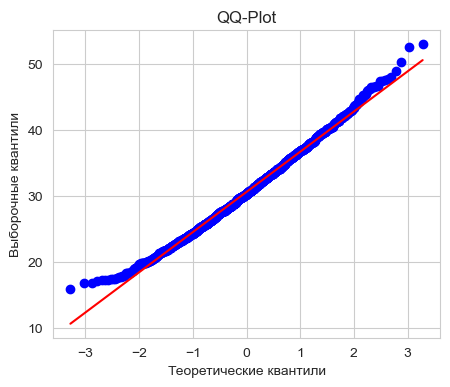

In [19]:
plt.figure(figsize=(5, 4))
sts.probplot(df1['bmi'], dist="norm", plot=plt)
plt.title("QQ-Plot")
plt.xlabel("Теоретические квантили")
plt.ylabel("Выборочные квантили")
plt.show()

##### Проверка на нормальность для charges.

In [20]:
df_kst_charges = df1['charges'].tolist()
df_kst_fit_charges = np.hstack([np.repeat(x, repeats=len(df_kst_charges)) for x in df_kst_charges])
loc, scale = sts.norm.fit(df_kst_charges)
normal = sts.norm(loc=loc, scale=scale)
ks_stat, p_value = sts.kstest(df1['charges'], normal.cdf)
print('Статистика критерия: ', ks_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Выборка не подчиняется нормальному распределению.')
else:
    print('Не отвергаем нулевую гипотезу: Выборка распределена нормально. ')

Статистика критерия:  0.18846204110424236
p-value:  4.39305730768502e-42
Отвергаем нулевую гипотезу: Выборка не подчиняется нормальному распределению.


##### QQ-plot для charges.

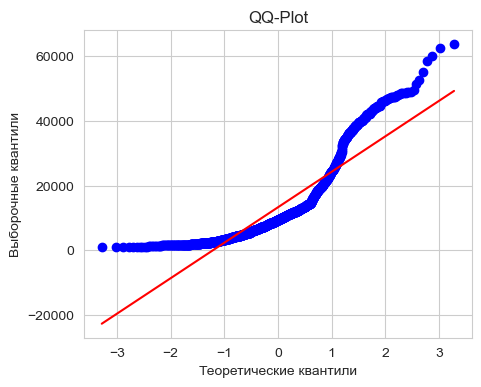

In [21]:
plt.figure(figsize=(5, 4))
sts.probplot(df1['charges'], dist="norm", plot=plt)
plt.title("QQ-Plot")
plt.xlabel("Теоретические квантили")
plt.ylabel("Выборочные квантили")
plt.show()

##### Проверка на нормальность с помощью критерия согласия Пирсона.
*(Это вообще не надо, это так для себя.)*

In [22]:
def distribution_test(data):
    data = data.to_frame()
    data = data.rename(columns={data.columns[0]: "value" })
    g = 1 + math.floor(math.log2(len(data)))
    N = randint(1,len(data))
    df_cpt_h = data.sample(n= N)
    n_group = 1 + (int(np.log2(len(df_cpt_h))))
    h = abs((df_cpt_h.max()) - (df_cpt_h.min())) / n_group
    df_cpt_h["table_cut"] = pd.cut(df_cpt_h.value, n_group)
    table = df_cpt_h.groupby("table_cut", as_index= False).count()
    upp = np.arange(min(df_cpt_h.value) + h[0] + 0.0001, max(df_cpt_h.value) + h[0], h[0])
    low = np.arange(min(df_cpt_h.value), max(df_cpt_h.value), h[0])
    med = (low+upp)/2
    table["low"] = low
    table["upp"] = upp
    table["median"] = med
    table["rel_freq"] = table.value/table.value.sum()
    mu_sample = sum(table["median"] * table.rel_freq)
    sd_sample = sum((table["median"] - mu_sample)**2 * table.rel_freq)**0.5
    
    def inter_norm(upper, MU, SD):
        h = 0.01
        arrx = np.arange(-1000, upper, 0.01)
        arry = sts.norm.pdf(arrx, mu_sample, sd_sample)
        s = 0
        for num in range(len(arrx)):
            s += abs(h * arry[num])
        return s
    
    def xi_norm(table_norm, mean, sd):
        N = sum(table_norm.value)
        pract = table_norm.value
        xi_test = pd.DataFrame({'pract': table_norm.value})
        xi_test["theor"] = 0
        for i in range(len(pract)):
            xi_test.theor.iloc[i] = N * ((inter_norm(table_norm.upp.iloc[i], mean, sd) - (inter_norm(table_norm.low.iloc[i], mean, sd))))
        xi = sum((xi_test.pract - xi_test.theor)**2/xi_test.theor)
        print(xi_test)
        return xi
    print(xi_norm(table, mu_sample, sd_sample) < sts.chi2.ppf(0.95, n_group-2-1))

In [23]:
distribution_test(df1['bmi'])

   pract      theor
0      9   6.448096
1     17  16.087509
2     29  27.170679
3     27  31.034044
4     21  23.973629
5     17  12.523511
6      5   4.427673
True


In [24]:
distribution_test(df1['charges'])

   pract       theor
0    312  120.906152
1    236  156.386737
2     75  155.175271
3     53  118.117875
4     20   68.970272
5     30   30.890222
6     37   10.610631
7     16    2.794793
8      1    0.564373
9      4    0.087356
False


# №9
**Загрузить данные из файла “ECDCCases.csv”.**

In [25]:
df2 = pd.read_csv('/Users/katy/Documents/Mirea/7 сем/Бигдата/ПР3/ECDCCases.csv')

# №10
**Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.**

In [26]:
df2.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

##### Количество пропущенных значений в процентах

In [27]:
df2.isnull().sum () / len(df2)*100

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64

##### Удалить два признака, в которых больше всех пропущенных значений.

In [28]:
df2 = df2.drop(['geoId', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis= 1)

##### Заполним пропуски в оставшихся столбцах.

In [29]:
df2 = df2.fillna({'popData2019':df2['popData2019'].mean(), 'countryterritoryCode':'Other'})

In [30]:
df2.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

Пропусков больше нет.

# №11
**Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.**

In [31]:
emissions = df2.describe()
emissions

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529724e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.813207e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.860872e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


По полученной статистике, можно узнать какие признаки содержат выбросы. Будем считать значения за пределами диапазона (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) как выбросы.


In [32]:
def find_emissions(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = df2[column_name].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upp = Q3 + 1.5 * IQR
    emissions_values = data[(data[column_name] < low) | (data[column_name] > upp)]
    num_emissions = len(emissions_values)
    print(F'Интервал: ({low}, {upp})')
    print("Количество выбросов:", num_emissions)

In [33]:
find_emissions(df2, 'day')

Интервал: (-14.5, 45.5)
Количество выбросов: 0


In [34]:
find_emissions(df2, 'month')

Интервал: (-2.5, 17.5)
Количество выбросов: 0


In [35]:
find_emissions(df2, 'year')

Интервал: (2020.0, 2020.0)
Количество выбросов: 67


In [36]:
find_emissions(df2, 'cases')

Интервал: (-409.5, 682.5)
Количество выбросов: 10080


In [37]:
find_emissions(df2, 'deaths')

Интервал: (-6.0, 10.0)
Количество выбросов: 10657


In [38]:
find_emissions(df2, 'popData2019')

Интервал: (-39601022.5, 69534557.5)
Количество выбросов: 6661


Видим, что выбросы есть в нескольких признаках: year, cases, deaths и popData2019.

##### Страны, для который количество смертей в день превысило 3000 и количество таких дней.

In [39]:
df2_deaths = df2[df2['deaths'] >= 3000][['countryterritoryCode', 'day']]
df2_gr = df2_deaths.groupby(['countryterritoryCode']).count()
df2_gr

,day
countryterritoryCode,
ARG,1
ECU,1
MEX,1
PER,2
USA,6


# №12
**Найти дублирование данных. Удалить дубликаты.**

In [40]:
df2_duplicate = df2[df2.duplicated ()]
df2_duplicate

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [41]:
df2.drop_duplicates()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


# №13
**Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая  выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий ШопироУилка) и на гомогенность дисперсии (критерий Бартлетта).**

In [42]:
df3 = pd.read_csv('/Users/katy/Documents/Mirea/7 сем/Бигдата/ПР3/bmi.csv')

##### Две выборки: 

Размер выборок n = 250

In [43]:
sample1 = df3[df3['region'] == 'northwest']['bmi'].sample(n= 250).to_frame()
sample2 = df3[df3['region'] == 'southwest']['bmi'].sample(n= 250).to_frame()

##### Проверка выборок на нормальность критерием Шапиро-Уилка.

H0 - Выборка имеет нормальное распределение.
H1 - Не имеет.

In [44]:
shapiro_stat, p_value = sts.shapiro(sample1)
print('Статистика критерия: ', shapiro_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Выборка не имеет нормального распределения.')
else:
    print('Не отвергаем нулевую гипотезу: Выборка имеет нормальное распределение. ')

Статистика критерия:  0.9936574697494507
p-value:  0.3722914457321167
Не отвергаем нулевую гипотезу: Выборка имеет нормальное распределение. 


In [45]:
shapiro_stat, p_value = sts.shapiro(sample2)
print('Статистика критерия: ', shapiro_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Выборка не имеет нормального распределения.')
else:
    print('Не отвергаем нулевую гипотезу: Выборка имеет нормальное распределение. ')

Статистика критерия:  0.995595395565033
p-value:  0.6993665099143982
Не отвергаем нулевую гипотезу: Выборка имеет нормальное распределение. 


Обе выборки распределены нормально.

##### Проверка выборов на гомогенность дисперсии (критерий Бартлетта).

H0 - Диспресии двух независимых выборок одинаковы.
H1 - Не одинаковы.

In [46]:
bartlett_stat, p_value = sts.bartlett(sample1['bmi'], sample2['bmi'])
print('Статистика критерия: ', bartlett_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Дисперсии выборок не равны.')
else:
    print('Не отвергаем нулевую гипотезу: Дисперсии выборок равны. ')

Статистика критерия:  1.1787285421639921
p-value:  0.2776149911534663
Не отвергаем нулевую гипотезу: Дисперсии выборок равны. 


##### Сравнение средних значений выборок с помощью t-критерия Стьюдента.


H0 - Средние значения двух независимых выборок равны.
H1 - Не равны.

In [47]:
tt_stat, p_value = sts.ttest_ind(sample1, sample2)
print('Статистика критерия:', tt_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Средние значения двух выборок не равны.')
else:
    print('Не отвергаем нулевую гипотезу: Средние значения двух выборок равны. ')

Статистика критерия: [-2.45500817]
p-value:  [0.01442903]
Отвергаем нулевую гипотезу: Средние значения двух выборок не равны.


# №14
**Кубик бросили 600 раз. С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().**

In [48]:
observed = [97, 98, 109, 95, 97, 104]
expected = [100, 100, 100, 100, 100, 100]

chi2_stat, p_value = sts.chisquare(observed, f_exp=expected)
print('Статистика критерия Хи-квадрат: ', chi2_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Распределение не является равномерным.')
else:
    print('Не отвергаем нулевую гипотезу: Распределение равномерное.')

Статистика критерия Хи-квадрат:  1.44
p-value:  0.9198882077437889
Не отвергаем нулевую гипотезу: Распределение равномерное.


# №15
**С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.**

In [49]:
df4 = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
df4.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

In [50]:
df4

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


H0: Категориальные переменные A и B независимы;
H1: Категориальные переменные A и B связаны между собой.

In [51]:
chi2_stat, p_value = sts.chi2_contingency(df4)[:2]
print('Статистика критерия Хи-квадрат: ', chi2_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: Семейное положение влияет на занятость.')
else:
    print('Не отвергаем нулевую гипотезу: Семейное положение не влияет на занятость. ')

Статистика критерия Хи-квадрат:  122.29654948595365
p-value:  1.7291616900960234e-21
Отвергаем нулевую гипотезу: Семейное положение влияет на занятость.
